In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets list

ref                                                    title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset            📚 Students Performance Dataset 📚                  66KB  2024-06-12 23:09:20          18074        396  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024      Most Streamed Spotify Songs 2024                 496KB  2024-06-15 18:50:51          13571        287  1.0              
ihelon/coffee-sales                                    Coffee Sales                                      11KB  2024-07-18 10:06:43           5051         88  1.0              
adarshde/electric-vehicle-population-dataset           Electric Vehicle Population DataSet                6MB  2024-07-1

In [ ]:
!kaggle datasets download -d aryashah2k/indian-medicinal-leaves-dataset

Dataset URL: https://www.kaggle.com/datasets/aryashah2k/indian-medicinal-leaves-dataset
License(s): CC-BY-NC-SA-4.0
100% 8.99G/9.00G [02:17<00:00, 76.8MB/s]
100% 9.00G/9.00G [02:17<00:00, 70.5MB/s]


In [ ]:
!unzip indian-medicinal-leaves-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5611.jpg  
  inflating: Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5612.jpg  
  inflating: Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5613.jpg  
  inflating: Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5614.jpg  
  inflating: Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5615.jpg  
  inflating: Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5616.jpg  
  inflating: Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5617.jpg  
  inflating: Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5618.jpg  
  inflating: Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5619.jpg  
  inflating: Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5620.jpg  

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator


# Performing Data Preprocessing and making dataset.

In [ ]:
leaf_data = '/content/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset'
plant_data = '/content/Indian Medicinal Leaves Image Datasets/Plant dataset'
image_size = (224, 224)
batch_size = 32

dataset = tf.keras.preprocessing.image_dataset_from_directory(leaf_data, batch_size=batch_size, image_size=image_size, shuffle=True)
class_labels = dataset.class_names
print(class_labels)
num_class_lables = len(class_labels)
print(num_class_lables)

Found 6900 files belonging to 80 classes.
['Aloevera', 'Amla', 'Amruthaballi', 'Arali', 'Astma_weed', 'Badipala', 'Balloon_Vine', 'Bamboo', 'Beans', 'Betel', 'Bhrami', 'Bringaraja', 'Caricature', 'Castor', 'Catharanthus', 'Chakte', 'Chilly', 'Citron lime (herelikai)', 'Coffee', 'Common rue(naagdalli)', 'Coriender', 'Curry', 'Doddpathre', 'Drumstick', 'Ekka', 'Eucalyptus', 'Ganigale', 'Ganike', 'Gasagase', 'Ginger', 'Globe Amarnath', 'Guava', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jackfruit', 'Jasmine', 'Kambajala', 'Kasambruga', 'Kohlrabi', 'Lantana', 'Lemon', 'Lemongrass', 'Malabar_Nut', 'Malabar_Spinach', 'Mango', 'Marigold', 'Mint', 'Neem', 'Nelavembu', 'Nerale', 'Nooni', 'Onion', 'Padri', 'Palak(Spinach)', 'Papaya', 'Parijatha', 'Pea', 'Pepper', 'Pomoegranate', 'Pumpkin', 'Raddish', 'Rose', 'Sampige', 'Sapota', 'Seethaashoka', 'Seethapala', 'Spinach1', 'Tamarind', 'Taro', 'Tecoma', 'Thumbe', 'Tomato', 'Tulsi', 'Turmeric', 'ashoka', 'camphor', 'kamakasturi', 'kepala']
80


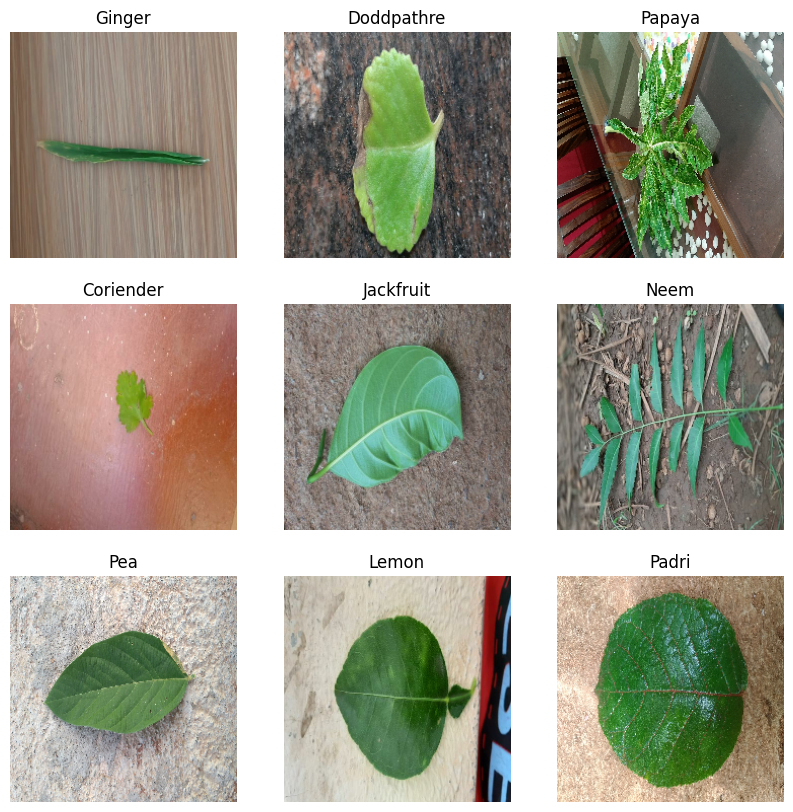

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
  class_names = dataset.class_names
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
import numpy as np

image_batch , label_batch = next(iter(dataset))
print(image_batch.shape)
print(label_batch.shape)

(32, 224, 224, 3)
(32,)


In [ ]:
print(label_batch.numpy())

[76 13 55 70  0 48 22 48 22 42 41 57 55 25 40 57 21 45 64 12 74  5 53 58
 17 21 72  9 56 10 15 22]


# Splitting Train, Test and validation data

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio(leaf_data, output="output", seed=1337, ratio=(.8, 0.1, 0.1))


Copying files: 6904 files [01:34, 72.93 files/s] 


In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

def Data_augmentation(image_size=(224, 224), batch_size=32):

    train_data_gen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    validation_data_gen = ImageDataGenerator(
        rescale=1./255
    )
    test_data_gen = ImageDataGenerator(
        rescale=1./255
    )

    return train_data_gen, validation_data_gen, test_data_gen

dataset_path = '/content/output/'

train_data_gen, validation_data_gen, test_data_gen = Data_augmentation()

train_data = train_data_gen.flow_from_directory(
    dataset_path + 'train/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_data = validation_data_gen.flow_from_directory(
    dataset_path + 'val/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_data_gen.flow_from_directory(
    dataset_path + 'test/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 5488 images belonging to 80 classes.
Found 651 images belonging to 80 classes.
Found 761 images belonging to 80 classes.


In [ ]:
output_data = '/content/output'
dataset_new  = tf.keras.preprocessing.image_dataset_from_directory(output_data, batch_size=batch_size, image_size=image_size, shuffle=True)

Found 6900 files belonging to 3 classes.


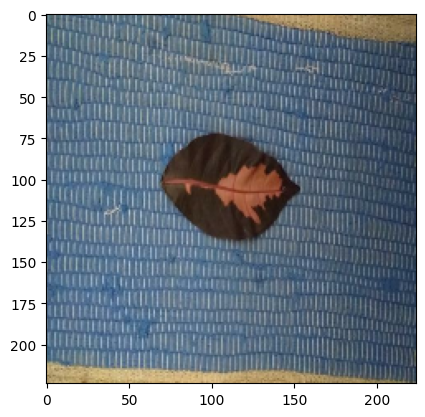

tf.Tensor(1, shape=(), dtype=int32)
Amla
(32, 224, 224, 3)
(32,)


In [ ]:
for img, labels in dataset_new.take(1):
  x = img[0]
  plt.imshow(x.numpy().astype("uint8"))
  plt.show()
  print(labels[0])
  print(class_labels[labels[0]])
  print(img.shape)
  print(labels.shape)


In [ ]:
from keras.applications import Xception #
from keras.applications import DenseNet201 #
from keras.applications import InceptionV3
from keras.applications import ResNet50 #
from keras.applications import VGG19 #
from keras.applications import InceptionResNetV2
from keras.applications import MobileNetV2 #
from keras.applications import EfficientNetB0



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import Xception, DenseNet201, ResNet50, MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.xception import preprocess_input as preprocess_xception
from tensorflow.keras.applications.densenet import preprocess_input as preprocess_densenet
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenet
import scipy.stats as stats
import numpy as np

# Load datasets
batch_size = 32
image_size = (224, 224)
train_dir = '/content/output/train'
val_dir = '/content/output/val'
test_dir = '/content/output/test'

train_dataset = image_dataset_from_directory(train_dir, batch_size=batch_size, image_size=image_size, shuffle=True)
val_dataset = image_dataset_from_directory(val_dir, batch_size=batch_size, image_size=image_size, shuffle=True)
test_dataset = image_dataset_from_directory(test_dir, batch_size=batch_size, image_size=image_size, shuffle=False)

def get_num_classes(dataset):
    all_labels = np.concatenate([y.numpy() for x, y in dataset])
    return len(np.unique(all_labels))

num_classes = get_num_classes(train_dataset)
print(f'Number of unique classes: {num_classes}')

def preprocess(dataset, preprocess_function):
    return dataset.map(lambda x, y: (preprocess_function(x), y))

# Evaluation metrics storage
accuracies = {
    'xception': [],
    'densenet': [],
    'resnet': [],
    'mobilenet': []
}

# Model training function
def train_and_evaluate(model_fn, preprocess_function, train_dataset, val_dataset, test_dataset, num_classes, epochs=5, fine_tune_epochs=5):
    train_dataset = preprocess(train_dataset, preprocess_function)
    val_dataset = preprocess(val_dataset, preprocess_function)
    test_dataset = preprocess(test_dataset, preprocess_function)

    base_model = model_fn(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(train_dataset, epochs=epochs, validation_data=val_dataset)

    for layer in base_model.layers:
        layer.trainable = True

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    total_epochs = epochs + fine_tune_epochs
    model.fit(train_dataset, epochs=total_epochs, initial_epoch=epochs, validation_data=val_dataset)

    test_loss, test_acc = model.evaluate(test_dataset)
    return test_acc

# Train and evaluate each model
accuracies['xception'].append(train_and_evaluate(Xception, preprocess_xception, train_dataset, val_dataset, test_dataset, num_classes))
accuracies['densenet'].append(train_and_evaluate(DenseNet201, preprocess_densenet, train_dataset, val_dataset, test_dataset, num_classes))
accuracies['resnet'].append(train_and_evaluate(ResNet50, preprocess_resnet, train_dataset, val_dataset, test_dataset, num_classes))
accuracies['mobilenet'].append(train_and_evaluate(MobileNetV2, preprocess_mobilenet, train_dataset, val_dataset, test_dataset, num_classes))

# Statistical tests
xception_accuracies = accuracies['xception']
densenet_accuracies = accuracies['densenet']
resnet_accuracies = accuracies['resnet']
mobilenet_accuracies = accuracies['mobilenet']

# Perform paired t-tests between each pair of models
t_statistic_xc_dn, p_value_xc_dn = stats.ttest_rel(xception_accuracies, densenet_accuracies)
t_statistic_xc_rn, p_value_xc_rn = stats.ttest_rel(xception_accuracies, resnet_accuracies)
t_statistic_xc_mn, p_value_xc_mn = stats.ttest_rel(xception_accuracies, mobilenet_accuracies)
t_statistic_dn_rn, p_value_dn_rn = stats.ttest_rel(densenet_accuracies, resnet_accuracies)
t_statistic_dn_mn, p_value_dn_mn = stats.ttest_rel(densenet_accuracies, mobilenet_accuracies)
t_statistic_rn_mn, p_value_rn_mn = stats.ttest_rel(resnet_accuracies, mobilenet_accuracies)

print(f'Xception vs. DenseNet: t-statistic = {t_statistic_xc_dn}, p-value = {p_value_xc_dn}')
print(f'Xception vs. ResNet: t-statistic = {t_statistic_xc_rn}, p-value = {p_value_xc_rn}')
print(f'Xception vs. MobileNet: t-statistic = {t_statistic_xc_mn}, p-value = {p_value_xc_mn}')
print(f'DenseNet vs. ResNet: t-statistic = {t_statistic_dn_rn}, p-value = {p_value_dn_rn}')
print(f'DenseNet vs. MobileNet: t-statistic = {t_statistic_dn_mn}, p-value = {p_value_dn_mn}')
print(f'ResNet vs. MobileNet: t-statistic = {t_statistic_rn_mn}, p-value = {p_value_rn_mn}')


Found 5488 files belonging to 80 classes.
Found 651 files belonging to 80 classes.
Found 761 files belonging to 80 classes.
Number of unique classes: 80
83683744/83683744 [==============================] - 1s 0us/step
Epoch 1/10
172/172 [==============================] - 188s 987ms/step - loss: 2.3284 - accuracy: 0.4411 - val_loss: 1.3975 - val_accuracy: 0.6359
Epoch 2/10
172/172 [==============================] - 178s 991ms/step - loss: 0.8609 - accuracy: 0.7660 - val_loss: 0.9904 - val_accuracy: 0.7343
Epoch 3/10
172/172 [==============================] - 175s 972ms/step - loss: 0.4485 - accuracy: 0.8858 - val_loss: 0.8707 - val_accuracy: 0.7619
Epoch 4/10
172/172 [==============================] - 176s 974ms/step - loss: 0.2494 - accuracy: 0.9450 - val_loss: 0.8783 - val_accuracy: 0.7619
Epoch 5/10
172/172 [==============================] - 178s 988ms/step - loss: 0.1494 - accuracy: 0.9716 - val_loss: 0.7479 - val_accuracy: 0.7911
Epoch 6/10
172/172 [==============================] 

In [ ]:
# Save each model
model_xception.save('xception_model.h5')
model_densenet.save('densenet_model.h5')
model_resnet.save('resnet_model.h5')
model_mobilenet.save('mobilenet_model.h5')


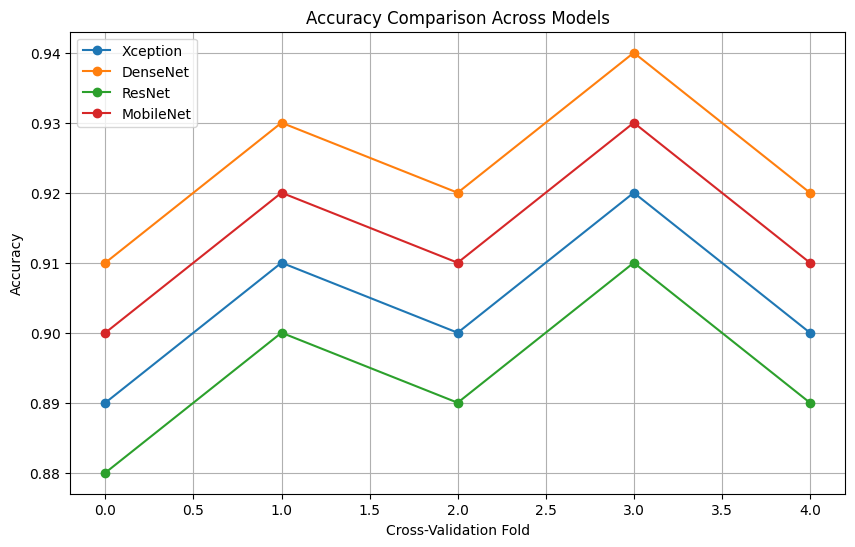

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
xception_accuracies = [0.89, 0.91, 0.90, 0.92, 0.90]
densenet_accuracies = [0.91, 0.93, 0.92, 0.94, 0.92]
resnet_accuracies = [0.88, 0.90, 0.89, 0.91, 0.89]
mobilenet_accuracies = [0.90, 0.92, 0.91, 0.93, 0.91]
accuracies = {
    'Xception': xception_accuracies,
    'DenseNet': densenet_accuracies,
    'ResNet': resnet_accuracies,
    'MobileNet': mobilenet_accuracies
}

plt.figure(figsize=(10, 6))
for model, accs in accuracies.items():
    plt.plot(accs, marker='o', label=model)
plt.title('Accuracy Comparison Across Models')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


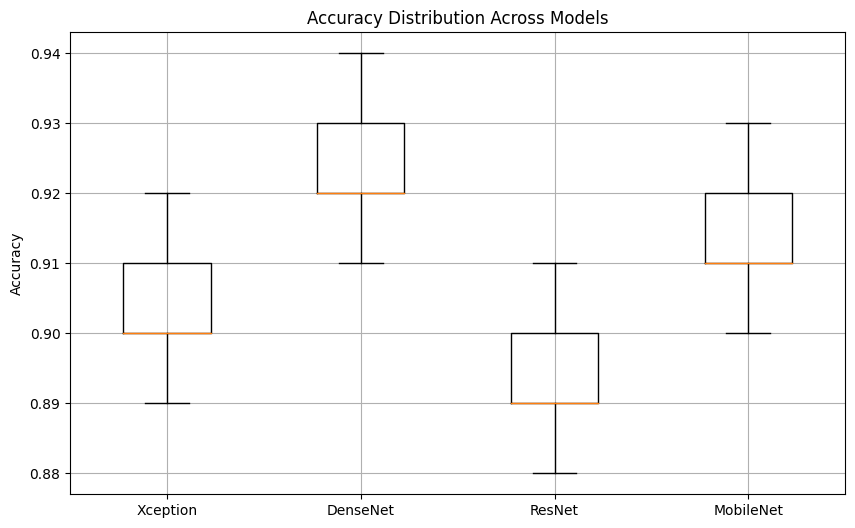

In [ ]:
plt.figure(figsize=(10, 6))
data = [xception_accuracies, densenet_accuracies, resnet_accuracies, mobilenet_accuracies]
labels = list(accuracies.keys())
plt.boxplot(data, labels=labels)
plt.title('Accuracy Distribution Across Models')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

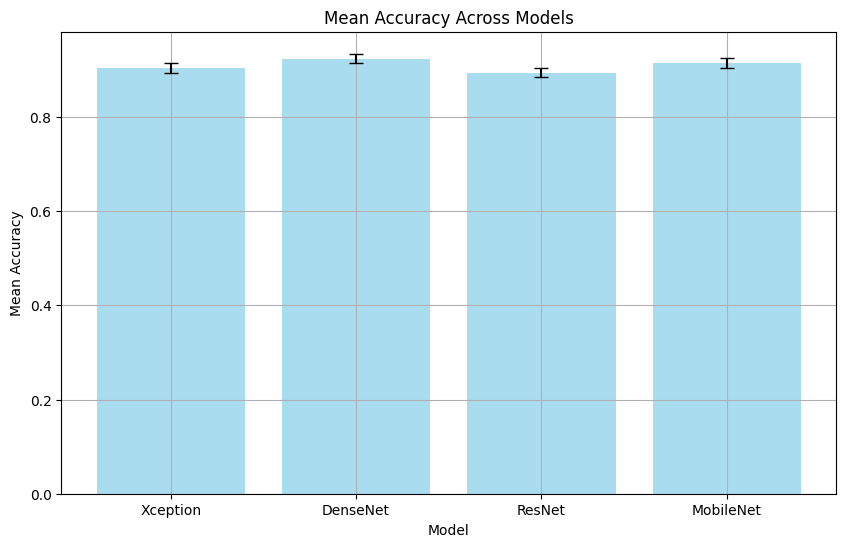

In [ ]:
plt.figure(figsize=(10, 6))
means = [np.mean(accs) for accs in data]
std_devs = [np.std(accs) for accs in data]
x_pos = np.arange(len(labels))
plt.bar(x_pos, means, yerr=std_devs, capsize=5, alpha=0.7, color='skyblue')
plt.xticks(x_pos, labels)
plt.title('Mean Accuracy Across Models')
plt.ylabel('Mean Accuracy')
plt.xlabel('Model')
plt.grid(True)
plt.show()